In [85]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import matplotlib.pyplot as plt
import numpy as np
import copy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


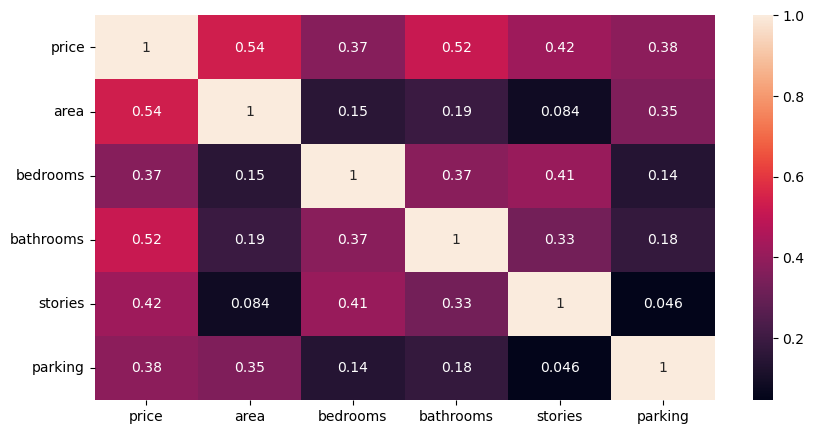

In [86]:
data = pd.read_csv('datasets/Housing.csv')
print(data.info())
data.drop(columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'],axis=1,inplace=True)

plt.figure(figsize=(10,5))  
sns.heatmap(data.corr(),annot=True)
plt.show()

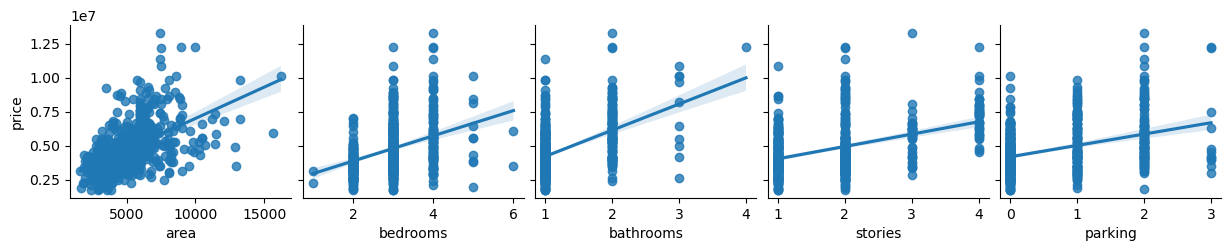

In [87]:
x_df = data.drop(['price'],axis=1) 
y_df = data['price']

sns.pairplot(data, 
             x_vars=x_df.columns, 
             y_vars='price',
             diag_kind='hist',
             kind='reg')

In [88]:
scaler = StandardScaler()
scaler.fit(x_df)  
x_df_scaled = scaler.transform(x_df)

In [89]:
# numpy data
# x = np.array(data[['area', 'bedrooms','bathrooms', 'stories', 'parking']])
x = np.array(x_df_scaled)
print(f"x data: {x[:1]}")
print(f"x.shape: {x.shape}")

y = np.array(y_df)
y = y.reshape(-1, 1)
print(f"y data: {y[:1]}")
print(f"y.shape: {y.shape}")

x data: [[1.04672629 1.40341936 1.42181174 1.37821692 1.51769249]]
x.shape: (545, 5)
y data: [[13300000]]
y.shape: (545, 1)


In [90]:
def compute_cost_vect(x, y, w, b):
    m = x.shape[0]
    
    f_x = np.dot(x, w) + b
    cost = (f_x - y)**2
    cost_sum = np.sum(cost)
    total_cost = (1 / 2.0 * m) * cost_sum
    return total_cost

In [91]:
def compute_grad_vect(x, y, w, b):
    m = x.shape[0]
    
    f_wb = np.dot(x, w) + b
    error = f_wb - y
    dJ_dw = np.dot(x.T, error) * (1/m)  
    dJ_db = np.sum(error) * (1/m) 
    
    return (dJ_dw, dJ_db)

Lowest cost: 235113137275530336.0000
Best model equation: f = 684599.3077.x1 + 173525.4788.x2 + 4545344.3761


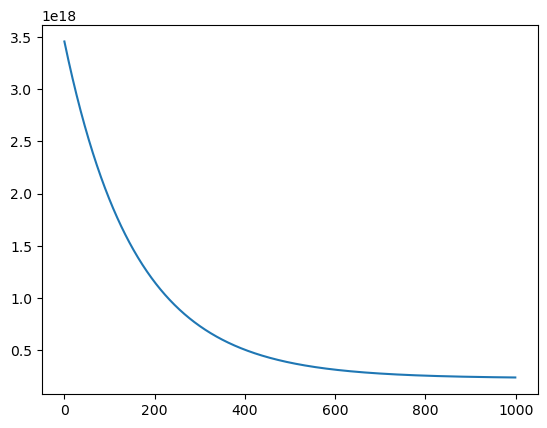

In [92]:
# training

# define model
w_init = np.array([[8100], [10], [3], [3], [3]])
b_init = 300000

# define count of iterations and alpha parameters
iterations = 1000
alpha = 3.0e-3

# avoid modifying global array 
w = copy.deepcopy(w_init)
b = copy.deepcopy(b_init)

# arrays to store cost values and model parameters (w and b) in all steps of training - to future plotting function
cost_history = []
model_history = []

# run training
for i in range(iterations):
    dJ_dw, dJ_db = compute_grad_vect(x, y, w, b)
    
    w = w - np.dot(dJ_dw, alpha)
    b = b - np.dot(dJ_db, alpha)
    
    # save all costs and model parameters in to arrays
    cost_history.append(compute_cost_vect(x, y, w, b))
    model_history.append([w, b])

print(f"Lowest cost: {cost_history[-1]:.4f}")
print("Best model equation: f = {:.4f}.x1 + {:.4f}.x2 + {:.4f}".format(model_history[-1][0][0][0], model_history[-1][0][1][0], model_history[-1][1]))
plt.plot(cost_history)